In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
# We display tag, dep, pos and an explanation for each of them
doc1 = nlp('''The son of a salesman who later operated an electrochemical factory, instein was born in the German 
Empire, but moved to Switzerland in 1895 and renounced his German citizenship in 1896. Specializing in physics and 
mathematics, he received his academic teaching diploma from the Swiss Federal Polytechnic School (German: 
eidgenössische polytechnische Schule) in Zürich in 1900. The following year, he acquired Swiss citizenship, which 
he kept for his entire life. After initially struggling to find work, from 1902 to 1909 he was employed as a patent examiner 
at the Swiss Patent Office in Bern.''') 

for token in doc1:
    print("Word is :", token.text)
    print("POS is: ", token.pos, '===', token.pos_, '===', spacy.explain(token.pos_))
    print("Dep is: ", token.dep, '===', token.dep_, '===', spacy.explain(token.dep_))
    print("Tag is: ", token.tag, '===', token.tag_, '===', spacy.explain(token.tag_))
    print('------------------------------------')
    

Word is : The
POS is:  90 === DET === determiner
Dep is:  415 === det === determiner
Tag is:  15267657372422890137 === DT === determiner
------------------------------------
Word is : son
POS is:  92 === NOUN === noun
Dep is:  430 === nsubjpass === nominal subject (passive)
Tag is:  15308085513773655218 === NN === noun, singular or mass
------------------------------------
Word is : of
POS is:  85 === ADP === adposition
Dep is:  443 === prep === prepositional modifier
Tag is:  1292078113972184607 === IN === conjunction, subordinating or preposition
------------------------------------
Word is : a
POS is:  90 === DET === determiner
Dep is:  415 === det === determiner
Tag is:  15267657372422890137 === DT === determiner
------------------------------------
Word is : salesman
POS is:  92 === NOUN === noun
Dep is:  439 === pobj === object of preposition
Tag is:  15308085513773655218 === NN === noun, singular or mass
------------------------------------
Word is : who
POS is:  95 === PRON ===

### Note that the attribute pos_ comes with the form of the word, which is VERB, and it has many values, summarized here:
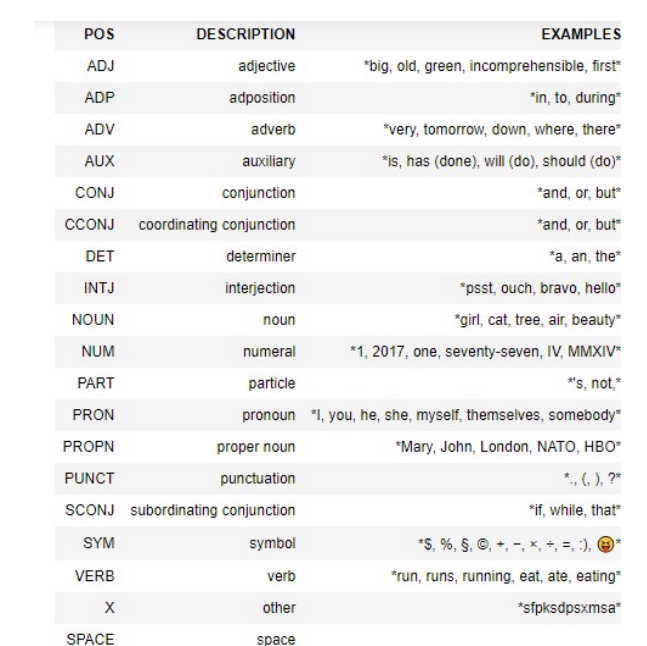

### While the attribute tag_ comes with full details, which are here: VBD, which is explained using explain.spacy, which It means tense past verb and the rest of the explanations are here
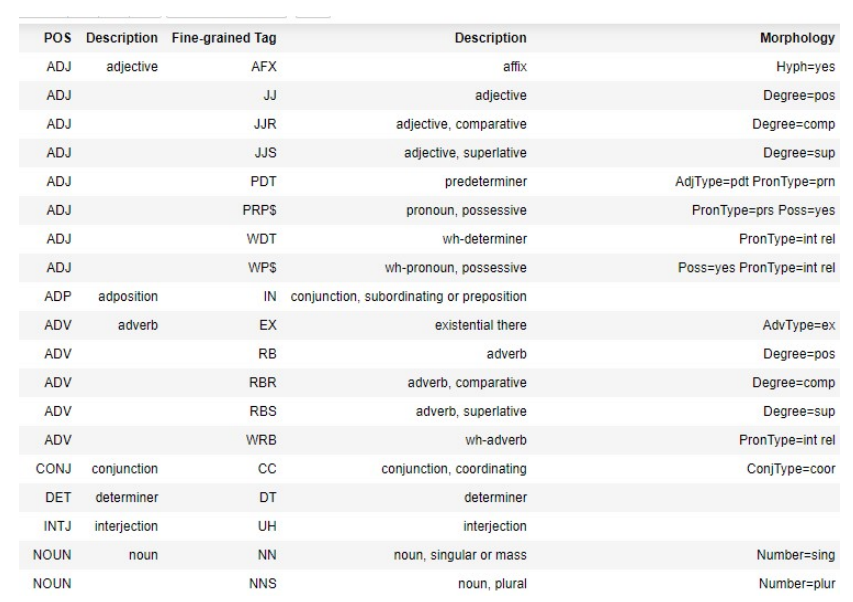
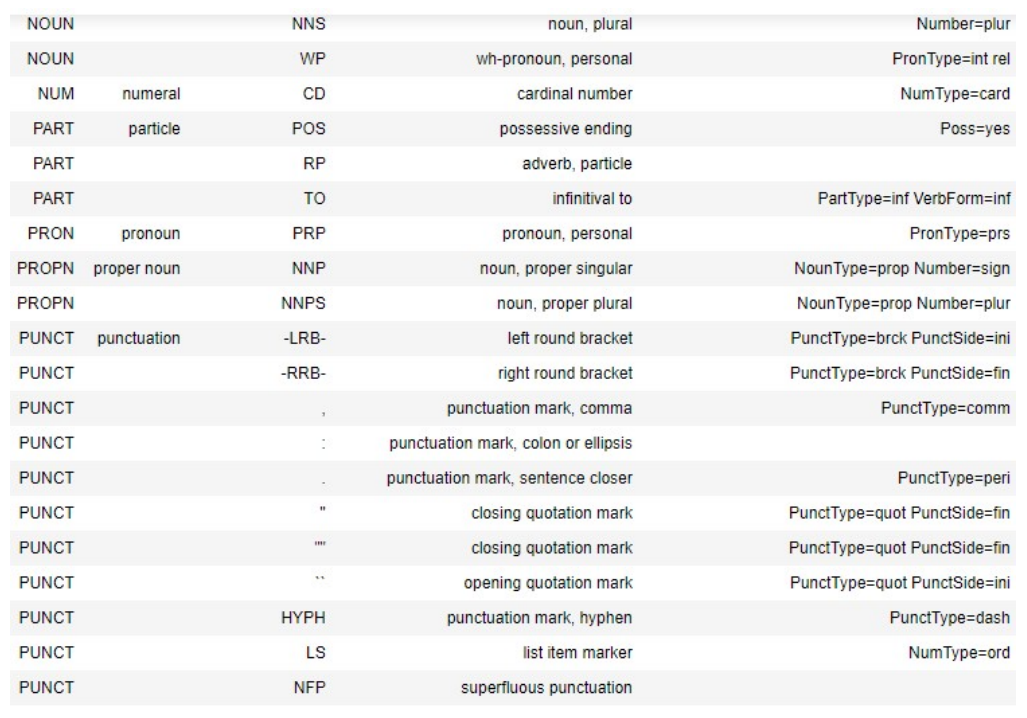
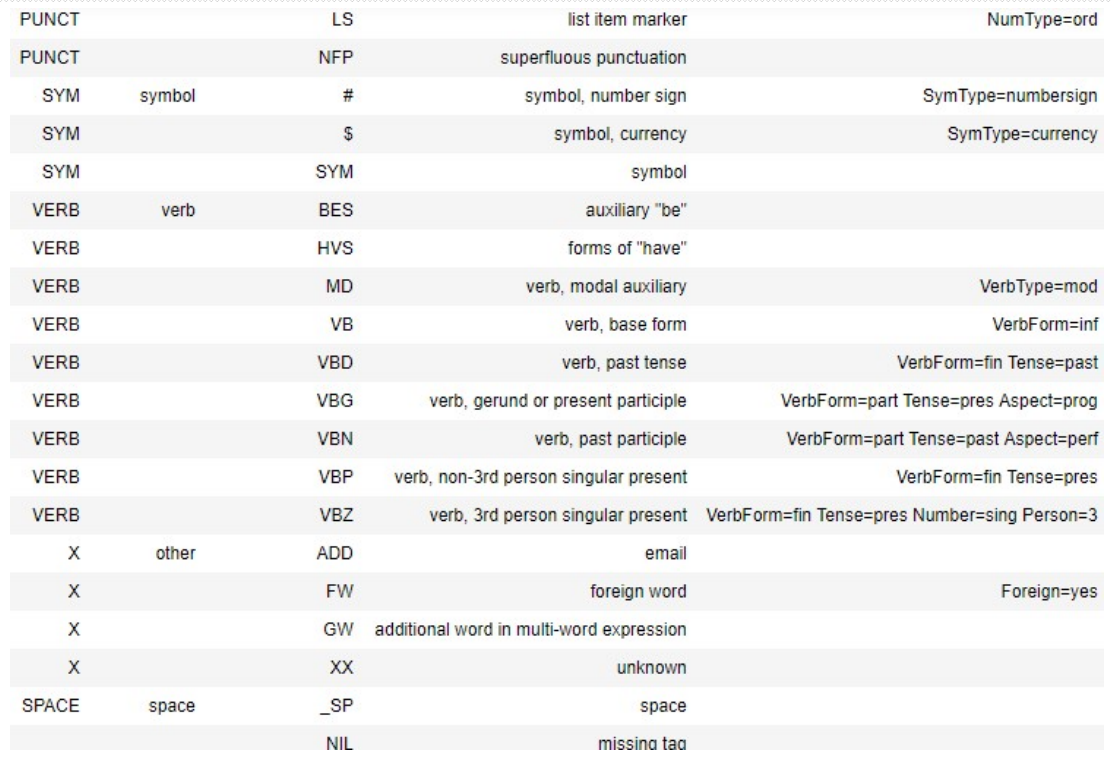

In [5]:
# Note pos tells you about the verb but tag tells you the time of the verb
for token in doc1:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
son        NOUN     NN     noun, singular or mass
of         ADP      IN     conjunction, subordinating or preposition
a          DET      DT     determiner
salesman   NOUN     NN     noun, singular or mass
who        PRON     WP     wh-pronoun, personal
later      ADV      RB     adverb
operated   VERB     VBD    verb, past tense
an         DET      DT     determiner
electrochemical ADJ      JJ     adjective (English), other noun-modifier (Chinese)
factory    NOUN     NN     noun, singular or mass
,          PUNCT    ,      punctuation mark, comma
instein    PROPN    NNP    noun, proper singular
was        AUX      VBD    verb, past tense
born       VERB     VBN    verb, past participle
in         ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
German     PROPN    NNP    noun, proper singular

          SPACE    _SP    whitespace
Empire     PROPN    NNP    noun, proper singular
,          PUNCT    , 

In [9]:
# Example for pos and tag
# Look at the verb here 
doc = nlp("I read book now")
r = doc[1]
print(f"{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}")

read       VERB     VBP    verb, non-3rd person singular present


In [10]:
# Look at the verb here 
doc = nlp('I read a book on NLP')
r = doc[1]
print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBD    verb, past tense


In [11]:
POS_counts = doc1.count_by(spacy.attrs.POS)
for k,v in sorted(POS_counts.items()):
    print(f'{k}.{doc1.vocab[k].text:{5}}: {v}')

84.ADJ  : 7
85.ADP  : 16
86.ADV  : 2
87.AUX  : 2
89.CCONJ: 3
90.DET  : 8
92.NOUN : 15
93.NUM  : 5
94.PART : 1
95.PRON : 9
96.PROPN: 15
97.PUNCT: 13
100.VERB : 11
103.SPACE: 5


In [12]:
TAG_counts = doc1.count_by(spacy.attrs.TAG)
for k,v in sorted(TAG_counts.items()):
    print(f'{k}.{doc1.vocab[k].text:{5}}: {v}')

164681854541413346.RB   : 2
783433942507015291.NNS  : 1
1292078113972184607.IN   : 16
1534113631682161808.VBG  : 2
2465883113906300949.-RRB-: 1
2593208677638477497.,    : 6
3822385049556375858.VBN  : 2
4062917326063685704.PRP$ : 3
4808651922106831370.WP   : 1
5595707737748328492.TO   : 1
6893682062797376370._SP  : 5
8427216679587749980.CD   : 5
10554686591937588953.JJ   : 7
11532473245541075862.:    : 1
12646065887601541794..    : 4
13656873538139661788.PRP  : 4
14200088355797579614.VB   : 1
15267657372422890137.DT   : 8
15308085513773655218.NN   : 14
15794550382381185553.NNP  : 15
17109001835818727656.VBD  : 8
17111077179131903759.-LRB-: 1
17202369883303991778.WDT  : 1
17571114184892886314.CC   : 3


In [13]:
DEP_counts = doc1.count_by(spacy.attrs.DEP)
for k,v in sorted(DEP_counts.items()):
    print(f"{k}.{doc1.vocab[k].text:{4}} {v}")

399.advcl 1
400.advmod 2
402.amod 7
403.appos 1
405.aux  1
406.auxpass 2
407.cc   3
410.conj 3
414.dep  5
415.det  8
416.dobj 6
428.npadvmod 1
429.nsubj 4
430.nsubjpass 3
438.pcomp 1
439.pobj 15
440.poss 3
443.prep 16
445.punct 13
447.relcl 2
450.xcomp 1
7037928807040764755.compound 10
8206900633647566924.ROOT 4


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...


word: (Moses), type: (NNS), means : (noun, plural)
word: (supposes), type: (VBZ), means : (verb, 3rd person singular present)
word: (his), type: (PRP$), means : (pronoun, possessive)
word: (toeses), type: (NNS), means : (noun, plural)
word: (are), type: (VBP), means : (verb, non-3rd person singular present)
word: (roses), type: (NNS), means : (noun, plural)
word: (but), type: (CC), means : (conjunction, coordinating)
word: (moses), type: (VBZ), means : (verb, 3rd person singular present)
word: (supposes), type: (NNS), means : (noun, plural)
word: (erroneously), type: (RB), means : (adverb)


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [16]:
text = 'Moses supposes his toeses are roses but moses supposes erroneously'
for w,m in nltk.pos_tag(nltk.word_tokenize(text)):
    print(f'word: ({w}), type: ({m}), means : ({spacy.explain(m)})')

word: (Moses), type: (NNS), means : (noun, plural)
word: (supposes), type: (VBZ), means : (verb, 3rd person singular present)
word: (his), type: (PRP$), means : (pronoun, possessive)
word: (toeses), type: (NNS), means : (noun, plural)
word: (are), type: (VBP), means : (verb, non-3rd person singular present)
word: (roses), type: (NNS), means : (noun, plural)
word: (but), type: (CC), means : (conjunction, coordinating)
word: (moses), type: (VBZ), means : (verb, 3rd person singular present)
word: (supposes), type: (NNS), means : (noun, plural)
word: (erroneously), type: (RB), means : (adverb)


In [17]:
text = ''' 
Thomas Gradgrind, sir. A man of realities. A man of facts and calculations. A man who proceeds upon the 
principle that two and two are four, and nothing over, and who is not to be talked into allowing for anything over. 
32 
Thomas Gradgrind, sir—peremptorily Thomas—Thomas Gradgrind. With a rule and a pair of scales, and the 
multiplication table always in his pocket, sir, ready to weigh and measure any parcel of human nature, and tell 
you exactly what it comes to. It is a mere question of figures, a case of simple arithmetic. You might hope to 
get some other nonsensical belief into the head of George Gradgrind, or Augustus Gradgrind, or John 
Gradgrind, or Joseph Gradgrind (all supposititious, non-existent persons), but into the head of Thomas 
Gradgrind—no, sir! 
In such terms Mr. Gradgrind always mentally introduced himself, whether to his private circle of acquaintance, 
or to the public in general. In such terms, no doubt, substituting the words ‘boys and girls,’ for ‘sir,’ Thomas 
Gradgrind now presented Thomas Gradgrind to the little pitchers before him, who were to be filled so full of 
facts. 
''' 

custom_sent_tokenizer = PunktSentenceTokenizer(text)

tokenized = custom_sent_tokenizer.tokenize(text)

tokenized[:10]

[' \nThomas Gradgrind, sir.',
 'A man of realities.',
 'A man of facts and calculations.',
 'A man who proceeds upon the \nprinciple that two and two are four, and nothing over, and who is not to be talked into allowing for anything over.',
 '32 \nThomas Gradgrind, sir—peremptorily Thomas—Thomas Gradgrind.',
 'With a rule and a pair of scales, and the \nmultiplication table always in his pocket, sir, ready to weigh and measure any parcel of human nature, and tell \nyou exactly what it comes to.',
 'It is a mere question of figures, a case of simple arithmetic.',
 'You might hope to \nget some other nonsensical belief into the head of George Gradgrind, or Augustus Gradgrind, or John \nGradgrind, or Joseph Gradgrind (all supposititious, non-existent persons), but into the head of Thomas \nGradgrind—no, sir!',
 'In such terms Mr. Gradgrind always mentally introduced himself, whether to his private circle of acquaintance, \nor to the public in general.',
 'In such terms, no doubt, substitu

In [21]:
for i in tokenized[:5]:
    for w,m in nltk.pos_tag(nltk.word_tokenize(i)):
        print(f'word : ({w}), type: ({m}), means: ({spacy.explain(m)})')
        print('--------------------------')

word : (Thomas), type: (NNP), means: (noun, proper singular)
--------------------------
word : (Gradgrind), type: (NNP), means: (noun, proper singular)
--------------------------
word : (,), type: (,), means: (punctuation mark, comma)
--------------------------
word : (sir), type: (NN), means: (noun, singular or mass)
--------------------------
word : (.), type: (.), means: (punctuation mark, sentence closer)
--------------------------
word : (A), type: (DT), means: (determiner)
--------------------------
word : (man), type: (NN), means: (noun, singular or mass)
--------------------------
word : (of), type: (IN), means: (conjunction, subordinating or preposition)
--------------------------
word : (realities), type: (NNS), means: (noun, plural)
--------------------------
word : (.), type: (.), means: (punctuation mark, sentence closer)
--------------------------
word : (A), type: (DT), means: (determiner)
--------------------------
word : (man), type: (NN), means: (noun, singular or mas